In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [7]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'Price' column
df['price'] = scaler.fit_transform(df[['price']])

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,7420,4,2,3,1,0,0,0,1,2,1,0
1,0.909091,8960,4,4,4,1,0,0,0,1,3,0,0
2,0.909091,9960,3,2,2,1,0,1,0,0,2,1,1
3,0.906061,7500,4,2,2,1,0,1,0,1,3,1,0
4,0.836364,7420,4,1,2,1,1,1,0,1,2,0,0


In [10]:
# Example assuming you have other feature columns besides 'Price'
X = df.drop('price', axis=1)
y = df['price']

# Select the last 30 samples as the test set
X_train = X.iloc[:-30, :]
y_train = y.iloc[:-30]
X_test = X.iloc[-30:, :]
y_test = y.iloc[-30:]

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (515, 12)
X_test shape: (30, 12)
y_train shape: (515,)
y_test shape: (30,)


In [20]:
# Initialize the OrthogonalMatchingPursuit model
omp = OrthogonalMatchingPursuit()

# Define the parameter grid for grid search
param_grid = {
    'n_nonzero_coefs': [5, 10, 15],  # Example values, adjust as needed
    'tol': [1e-3, 1e-4, 1e-5]       # Example values, adjust as needed
}

# Initialize GridSearchCV
grid_search = GridSearchCV(omp, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_omp = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_omp.predict(X_test)



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_omp.py:771: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  coef_, self.n_iter_ = orthogonal_mp_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_omp.py:771: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  coef_, self.n_iter_ = orthogonal_mp_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_omp.py:771: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  coef_, self.n_iter_ = orthogonal_mp_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_omp.py:771: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. T

In [21]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Mean Squared Error: 0.00846189995968854
Best Hyperparameters: {'n_nonzero_coefs': 5, 'tol': 0.001}


In [22]:
# Get the feature importances (coefficients)
feature_importances = best_omp.coef_

# Create a DataFrame to display the importances with corresponding feature names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

             Feature  Importance
2          bathrooms    0.084883
7    hotwaterheating    0.073752
8    airconditioning    0.072151
10          prefarea    0.055182
3            stories    0.037439
4           mainroad    0.037206
6           basement    0.028305
5          guestroom    0.024957
9            parking    0.023037
1           bedrooms    0.011685
0               area    0.000020
11  furnishingstatus   -0.015380


In [27]:
# Create a DataFrame with real price, predicted price, and percentage of error
results_df = pd.DataFrame({
    'Real Price': y_test,
    'Predicted Price': y_pred,
    'Percentage Error': np.abs(((y_pred - y_test) / y_test)) * 100
})

In [28]:
results_df

,Real Price,Predicted Price,Percentage Error
515,0.060606,0.159520,163.207684
516,0.060606,0.093485,54.249497
517,0.060606,0.100894,66.475418
518,0.060606,0.112896,86.278819
519,0.060606,0.152401,151.461165
520,0.060606,0.172636,184.849230
521,0.056970,0.053456,6.167828
522,0.054545,0.147153,169.780034
523,0.054545,0.250012,358.355231
524,0.054545,0.083180,52.497551


In [31]:
results_df = results_df.iloc[:-3]

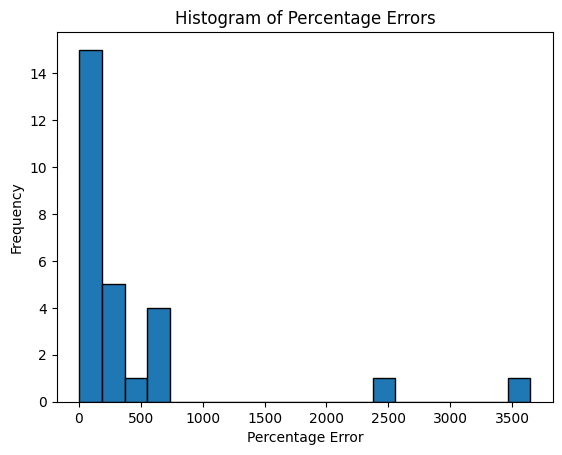

In [32]:
import matplotlib.pyplot as plt


# Create a histogram of the percentage errors
plt.hist(results_df['Percentage Error'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Percentage Error')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Errors')

# Show the plot
plt.show()


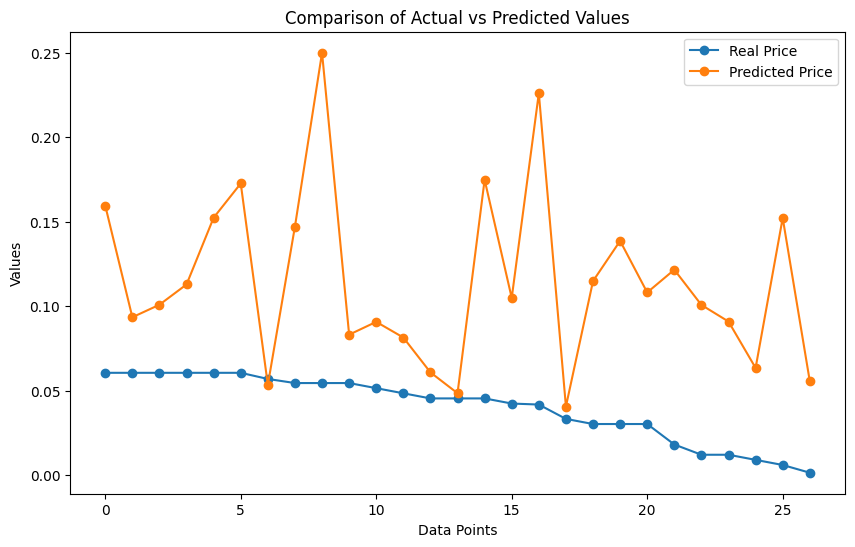

In [37]:
# Plotting a line chart
index = np.arange(len(results_df))

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(index, results_df['Real Price'], label='Real Price', marker='o')
plt.plot(index, results_df['Predicted Price'], label='Predicted Price', marker='o')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual vs Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()


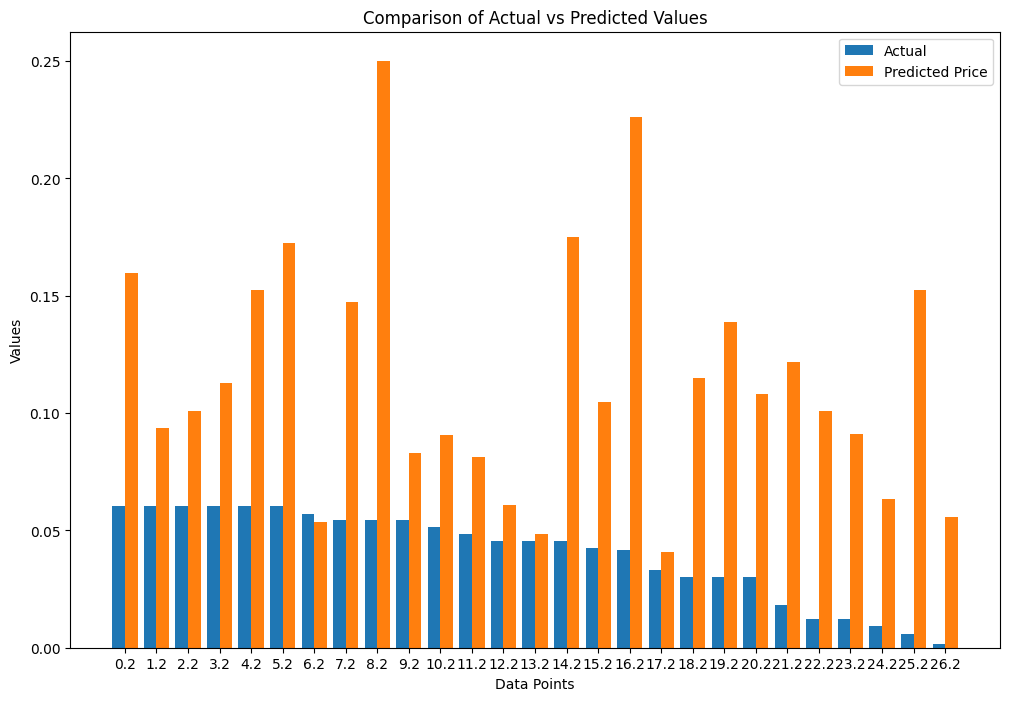

In [40]:
# Specify the figsize parameter for a larger figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting a grouped bar chart
bar_width = 0.4  # Adjust the bar_width based on your preferences
index = np.arange(len(results_df))

bar1 = ax.bar(index, results_df['Real Price'], bar_width, label='Actual')
bar2 = ax.bar(index + bar_width, results_df['Predicted Price'], bar_width, label='Predicted Price')

# Add labels and title
ax.set_xlabel('Data Points')
ax.set_ylabel('Values')
ax.set_title('Comparison of Actual vs Predicted Values')
ax.set_xticks(index + bar_width / 2)

# Add legend
ax.legend()

# Show the plot
plt.show()